<a href="https://colab.research.google.com/github/luisrondan2001/bioinformatic/blob/main/DCL_caso_de_estudio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Se estudia el efecto de cinco ingredientes diferentes (A, B, C, D y E) sobre el tiempo de reacción de un proceso químico. Cada lote de material nuevo sólo alcanza para permitir la realización de cinco corridas. Además, cada corrida requiere aproximadamente hora y media, por lo que sólo pueden realizarse cinco corridas en un día. El experimentador decide realizar el experimento como un cuadrado latino para que los efectos del día y el lote puedan controlarse sistemáticamente. Obtiene los datos que se muestran enseguida. Analizar los datos de este experimento (utilizar α = 0.05) y sacar conclusiones.

In [ ]:
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
data = {#data frame
    'Dia': [1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5],
    'Lote': [1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5],
    'Ingrediente': ['A', 'C', 'B', 'D', 'E', 'B', 'E', 'A', 'C', 'D', 'D', 'A', 'C', 'E', 'B', 'C', 'D', 'E', 'B', 'A', 'E', 'B', 'D', 'A', 'C'],
    'Tiempo_Reaccion': [8, 11, 4, 6, 4, 7, 2, 9, 8, 2, 1, 7, 10, 6, 3, 7, 3, 1, 6, 8, 3, 8, 5, 10, 8]
}
df = pd.DataFrame(data)
design_matrix = pd.pivot_table(df, values='Tiempo_Reaccion', index=['Dia', 'Lote'], columns='Ingrediente')
print(design_matrix)

Ingrediente     A    B     C    D    E
Dia Lote                              
1   1         8.0  NaN   NaN  NaN  NaN
    2         NaN  NaN  11.0  NaN  NaN
    3         NaN  4.0   NaN  NaN  NaN
    4         NaN  NaN   NaN  6.0  NaN
    5         NaN  NaN   NaN  NaN  4.0
2   1         NaN  7.0   NaN  NaN  NaN
    2         NaN  NaN   NaN  NaN  2.0
    3         9.0  NaN   NaN  NaN  NaN
    4         NaN  NaN   8.0  NaN  NaN
    5         NaN  NaN   NaN  2.0  NaN
3   1         NaN  NaN   NaN  1.0  NaN
    2         7.0  NaN   NaN  NaN  NaN
    3         NaN  NaN  10.0  NaN  NaN
    4         NaN  NaN   NaN  NaN  6.0
    5         NaN  3.0   NaN  NaN  NaN
4   1         NaN  NaN   7.0  NaN  NaN
    2         NaN  NaN   NaN  3.0  NaN
    3         NaN  NaN   NaN  NaN  1.0
    4         NaN  6.0   NaN  NaN  NaN
    5         8.0  NaN   NaN  NaN  NaN
5   1         NaN  NaN   NaN  NaN  3.0
    2         NaN  8.0   NaN  NaN  NaN
    3         NaN  NaN   NaN  5.0  NaN
    4        10.0  NaN   

In [ ]:

model = ols('Tiempo_Reaccion ~ C(Dia) + C(Lote) + C(Ingrediente)', data=df).fit()# Ajustar el modelo lineal
anova_table = anova_lm(model)# Realizar el análisis de varianza (ANOVA)
print(anova_table)

                  df  sum_sq    mean_sq          F    PR(>F)
C(Dia)           4.0   12.24   3.060000   0.978678  0.455014
C(Lote)          4.0   15.44   3.860000   1.234542  0.347618
C(Ingrediente)   4.0  141.44  35.360000  11.309168  0.000488
Residual        12.0   37.52   3.126667        NaN       NaN


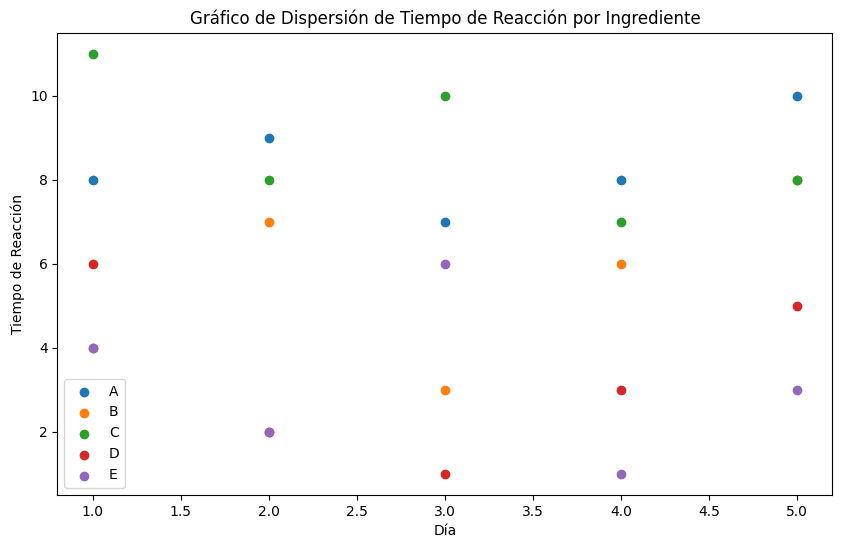

In [ ]:
import matplotlib.pyplot as plt
group_A = df[df['Ingrediente'] == 'A']
group_B = df[df['Ingrediente'] == 'B']
group_C = df[df['Ingrediente'] == 'C']
group_D = df[df['Ingrediente'] == 'D']
group_E = df[df['Ingrediente'] == 'E']

plt.figure(figsize=(10, 6))
plt.scatter(group_A['Dia'], group_A['Tiempo_Reaccion'], label='A')#graf de dispersión
plt.scatter(group_B['Dia'], group_B['Tiempo_Reaccion'], label='B')
plt.scatter(group_C['Dia'], group_C['Tiempo_Reaccion'], label='C')
plt.scatter(group_D['Dia'], group_D['Tiempo_Reaccion'], label='D')
plt.scatter(group_E['Dia'], group_E['Tiempo_Reaccion'], label='E')


plt.xlabel('Día')
plt.ylabel('Tiempo de Reacción')
plt.title('Gráfico de Dispersión de Tiempo de Reacción por Ingrediente')#titulos, leyenda y etiquetas 
plt.legend()

plt.show()

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Realizar la prueba de Tukey
tukey_results = pairwise_tukeyhsd(df['Tiempo_Reaccion'], df['Ingrediente'])

# Imprimir los resultados de la prueba de Tukey
print(tukey_results)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     A      B     -2.8 0.1423 -6.2171  0.6171  False
     A      C      0.4 0.9965 -3.0171  3.8171  False
     A      D     -5.0 0.0024 -8.4171 -1.5829   True
     A      E     -5.2 0.0016 -8.6171 -1.7829   True
     B      C      3.2 0.0733 -0.2171  6.6171  False
     B      D     -2.2 0.3361 -5.6171  1.2171  False
     B      E     -2.4 0.2578 -5.8171  1.0171  False
     C      D     -5.4 0.0011 -8.8171 -1.9829   True
     C      E     -5.6 0.0007 -9.0171 -2.1829   True
     D      E     -0.2 0.9998 -3.6171  3.2171  False
----------------------------------------------------


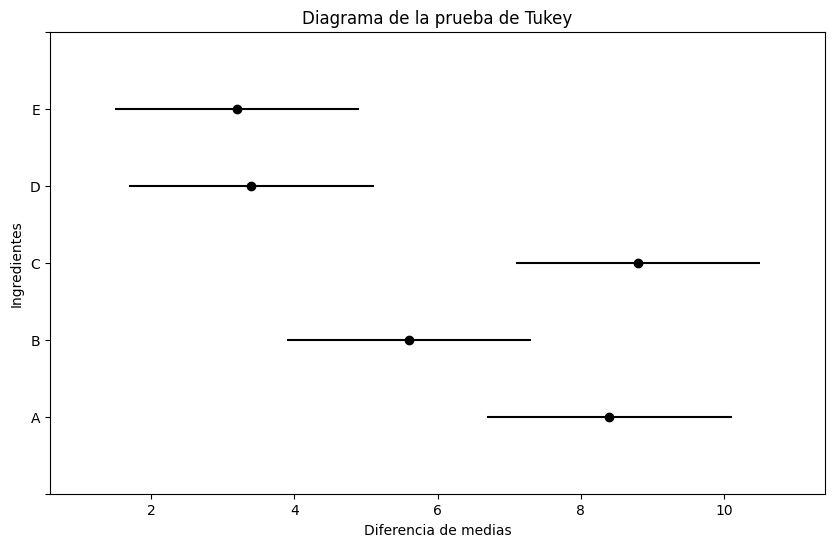

In [32]:
import matplotlib.pyplot as plt
from statsmodels.stats.multicomp import pairwise_tukeyhsd
# Crear el diagrama de la prueba de Tukey
fig = tukey_results.plot_simultaneous()

# Configurar los detalles del diagrama
plt.xlabel('Diferencia de medias')
plt.ylabel('Ingredientes')
plt.title('Diagrama de la prueba de Tukey')

# Mostrar el diagrama
plt.show()